# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

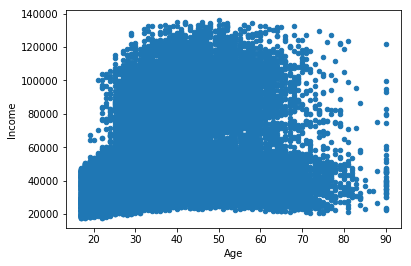

In [3]:
income.plot(x='Age', y='Income', kind='scatter')

La relación entre la edad y el ingreso, aunque con mucha varianza, es positiva dado que se puede evidenciar en la gráfica anterior que ante mayor edad, en muchos casos, el ingreso es mayor en comparación con personas que tienen edades menores.

In [27]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [68]:
X = income.Age.values.reshape(-1,1)
y = income.Income.values.reshape(-1,1)
linreg.fit(X, y)
print('Para una persona que aumente en una unidad su edad, el ingreso incrementará en: '+str(linreg.coef_[0][0]))

Para una persona que aumente en una unidad su edad, el ingreso incrementará en: 542.1676570723878


In [63]:
edades = np.array(range(30,41,1))
edades

array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])

In [69]:
p = linreg.predict(edades.reshape(-1,1))
prediccion = pd.DataFrame(p)
prediccion.index = edades
prediccion

,0
30,48803.117843
31,49345.285500
32,49887.453157
33,50429.620814
34,50971.788471
35,51513.956128
36,52056.123785
37,52598.291443
38,53140.459100
39,53682.626757


In [70]:
print('El ingreso proyectado para una persona con 30 anos de edad es: '+str(prediccion.loc[30][0]))
print('El ingreso proyectado para una persona con 40 anos de edad es: '+str(prediccion.loc[40][0]))


El ingreso proyectado para una persona con 30 anos de edad es: 48803.11784304026
El ingreso proyectado para una persona con 40 anos de edad es: 54224.79441376413


# Exercise 4.2
Evaluate the model using the MSE

In [97]:
from sklearn.metrics import mean_squared_error
y= income.Income.values
y_pred = linreg.predict(income.Age.values.reshape(-1,1))
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))

Mean squared error: 593783043.84



# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [101]:
linreg2 = LinearRegression()
income['Age2'] = income.Age**2
linreg2.fit(income[['Age', 'Age2']], income['Income'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [113]:
print('Model with only age: '+str(linreg.coef_[0]))
print('Model with age and age squared: '+ str(linreg2.coef_))
y= income.Income.values
y_pred2 = linreg2.predict(income[['Age','Age2']])
print("Mean squared error for model with only age: %.2f"
      % mean_squared_error(y, y_pred))
print("Mean squared error for model with age and age squared: %.2f"
      % mean_squared_error(y, y_pred2))

Model with only age: [542.16765707]
Model with age and age squared: [3131.77014151  -30.54341041]
Mean squared error for model with only age: 593783043.84
Mean squared error for model with age and age squared: 544646260.78


Cuando se agrega la edad al cuadrado, se puede evidenciar una reducción del MSE en un 8%

# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [114]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [5]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Exercise 4.5

Create Y and X

What is the distribution of the churners?

Split the data in train (70%) and test (30%)


In [127]:
from sklearn.model_selection import train_test_split
y= data['Churn?']
df = data[['Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls',
       'Intl Charge']]
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2333, 12) (2333,)
(1000, 12) (1000,)


# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [134]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
feature_cols = ['Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls',
       'Intl Charge']
logreg.fit(X_train, y_train)
predicciones = logreg.predict(X_test)

# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


In [135]:
score = logreg.score(X_test, y_test)
print(score)

0.858


In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicciones)
print(cm)

[[855   1]
 [141   3]]


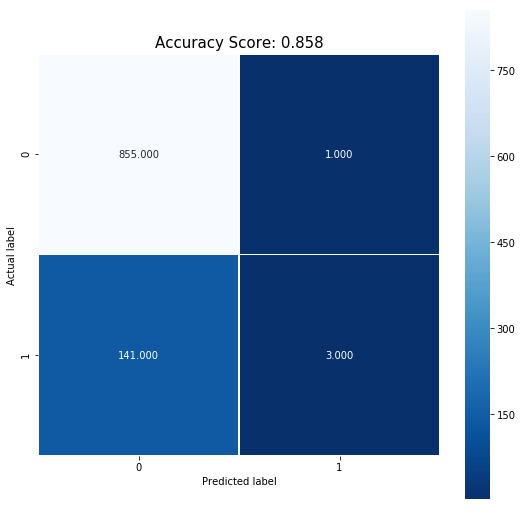

In [137]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);